In [ ]:
K-means :-
           K-means is part unsupervised machine learning.Its also divied data group according thier similar type.
            K-means ek machine learning clustering algorithm hai jo data ko alag-alag groups ya clusters mein baantta hai. Iska main maksad ye hota hai ki similar type ke data ko ek group mein rakha jaaye.

Steps:

Data ko "K" clusters mein divide karne ke liye hum pehle randomly "K" center points choose karte hain,
jise centroids kehte hain. Phir har data point ko sabse nazdeek centroid ke paas assign kiya jaata hai.
Ek baar saare data points assign ho jaate hain, to phir har cluster ka naya centroid calculate kiya jaata hai (jo cluster ke beech ka center hota hai). 
Ye process tab tak repeat hota hai jab tak centroids stable na ho jaayein.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


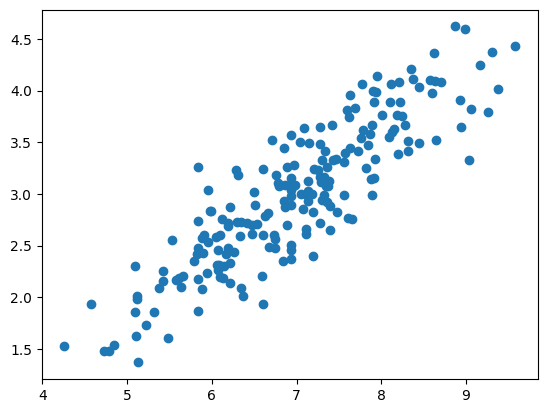

In [2]:
plt.scatter(df["cgpa"],df["package"])

In [4]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)       
wcss                                   # wcss its measure karta hai ki data point apne assigned cluster ke centroid(center point) se kitna door hain.
                                        # choti value (small value)= ki data points apke cluster ke bhuat pass hai( acha cluster) good value
                                       # badi value(large value)  = ki data point apke cluster se bhuta dur hai(bikhre hai)
""" jaise cluster ki value increase hoti hai vese hi inertia ki value kam hoti hai(322.77932949999996,17.806183308269695)
    kyuki zayda cluseter hone par points centers ke pass aa ajate hai"""

[322.77932949999996,
 123.01036360902256,
 64.842787322922,
 45.21859829381367,
 34.15511947860962,
 28.42220891666622,
 26.52891972573316,
 22.71580945363918,
 19.87217024242424,
 17.806183308269695]

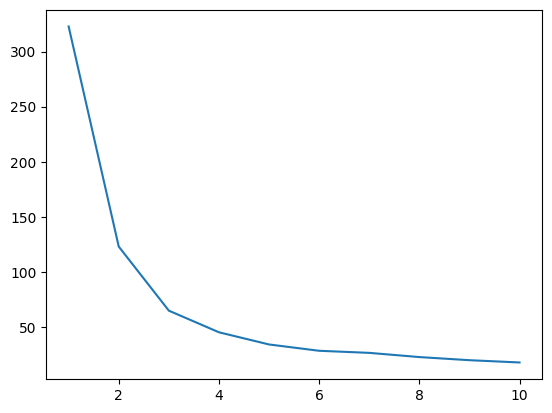

In [5]:
plt.plot(range(1,11),wcss)


In [6]:
X = df.iloc[:,:].values
# Yahan df ke data ko numpy array mein convert kar rahe hain iloc ke through, taki clustering algorithms mein use kiya ja sake.
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)
# KMeans ko 4 clusters ke liye initialize kar rahe hain.
# fit_predict() X data ko fit karta hai aur cluster labels ko predict karta hai. Resulting labels ko y_means variable mein store kiya gaya hai.

In [7]:
y_means

array([1, 0, 2, 2, 1, 2, 4, 4, 4, 2, 0, 4, 3, 1, 2, 1, 4, 0, 1, 1, 1, 1,
       4, 4, 4, 1, 2, 0, 4, 1, 1, 2, 1, 4, 1, 1, 4, 4, 3, 1, 3, 1, 4, 1,
       0, 2, 4, 4, 3, 3, 3, 3, 3, 4, 1, 2, 4, 4, 1, 1, 0, 0, 4, 3, 1, 2,
       0, 4, 1, 1, 4, 1, 2, 3, 1, 1, 1, 3, 4, 1, 2, 4, 0, 2, 0, 0, 1, 2,
       0, 4, 1, 4, 2, 1, 4, 4, 1, 4, 2, 1, 2, 1, 0, 1, 2, 4, 4, 4, 2, 2,
       2, 0, 3, 4, 0, 3, 3, 1, 1, 1, 0, 4, 0, 0, 4, 1, 4, 1, 2, 1, 4, 4,
       4, 4, 1, 4, 0, 1, 2, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 2, 4, 4, 1, 2,
       1, 1, 1, 4, 4, 3, 1, 1, 0, 3, 3, 2, 3, 2, 3, 3, 4, 2, 1, 4, 1, 1,
       4, 1, 2, 1, 4, 2, 4, 1, 2, 4, 2, 4, 1, 2, 4, 1, 2, 0, 2, 1, 4, 1,
       2, 4], dtype=int32)

In [8]:
X[y_means == 1,1]
# Yeh line un data points ko select karti hai jinka cluster label 1 hai, aur unka second column (index 1) nikalti hai.

array([3.26, 3.57, 2.89, 3.23, 2.98, 2.83, 3.16, 2.93, 3.65, 3.49, 3.26,
       3.08, 3.42, 2.87, 3.33, 2.7 , 2.76, 3.09, 3.09, 3.31, 2.92, 2.99,
       2.94, 3.34, 3.44, 3.28, 3.15, 3.  , 2.77, 2.66, 3.08, 2.61, 3.24,
       3.52, 3.  , 2.99, 2.88, 2.65, 3.16, 3.11, 3.12, 2.83, 3.13, 2.4 ,
       3.18, 3.04, 3.08, 2.85, 3.09, 3.13, 2.93, 3.33, 2.51, 2.99, 3.5 ,
       3.64, 3.03, 2.72, 3.08, 3.48, 2.46, 3.24])

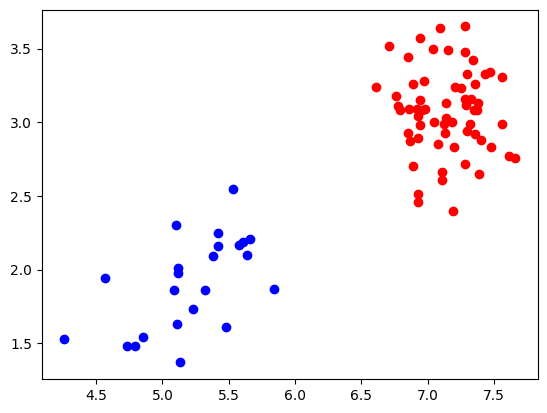

In [9]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
#plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
#plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
# Yeh lines scatter plots banati hain jisme alag-alag clusters ko different colors (blue, red, green, yellow) ke saath visualize kiya gaya hai

In [17]:
from sklearn.datasets import make_blobs
# make_blobs ek function hai jo synthetic data generate karta hai clustering ke examples banane ke liye.
centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]
#Yahan hum manually centroids aur cluster ke standard deviations set kar rahe hain synthetic data generate karne ke liye.
X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)
# make_blobs function ko use karke 200 data points generate karte hain. Har point ko 3 features diye gaye hain, aur data ko randomize karne ke liye random_state=1 use kiya gaya hai.
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

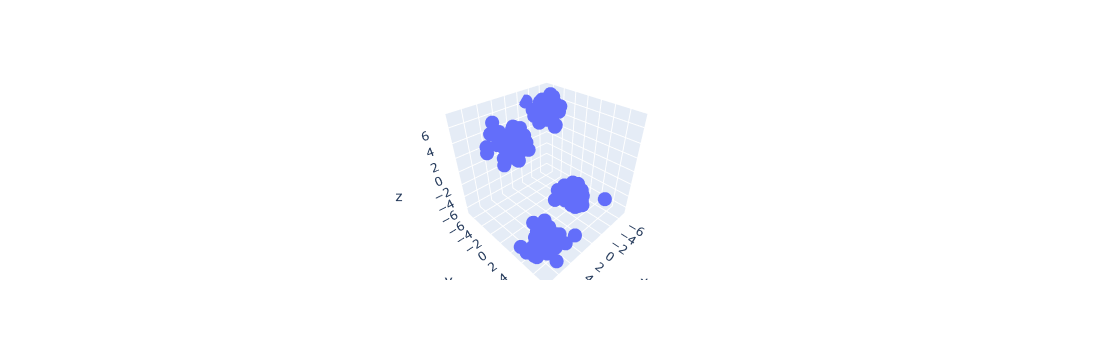

In [10]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [26]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)
# Phir se 1 se 20 clusters ke liye KMeans ko run kar rahe hain aur inertia values calculate kar ke wcss list mein store kar rahe hain.

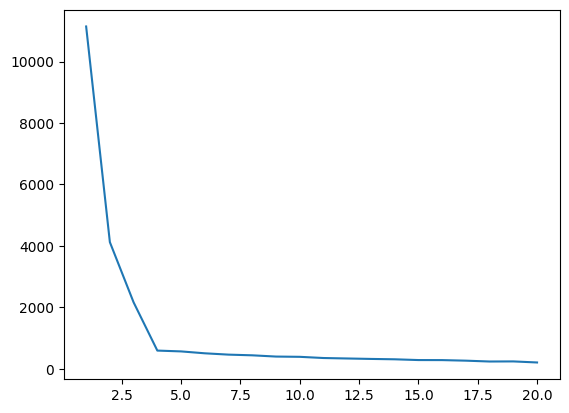

In [27]:
plt.plot(range(1,21),wcss)

In [ ]:
4 clusters ke liye KMeans clustering ko apply karte hain aur predicted cluster labels ko y_pred mein store karte hain.

In [29]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [ ]:
4 clusters ke liye KMeans clustering ko apply karte hain aur predicted cluster labels ko y_pred mein store karte hain.

In [33]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [ ]:
Yahan ek naya DataFrame banaya gaya hai jisme X ke har column ko col1, col2, col3 mein store kiya gaya hai. y_pred ko label column mein daal diya gaya hai, jo clusters ko represent karta hai.

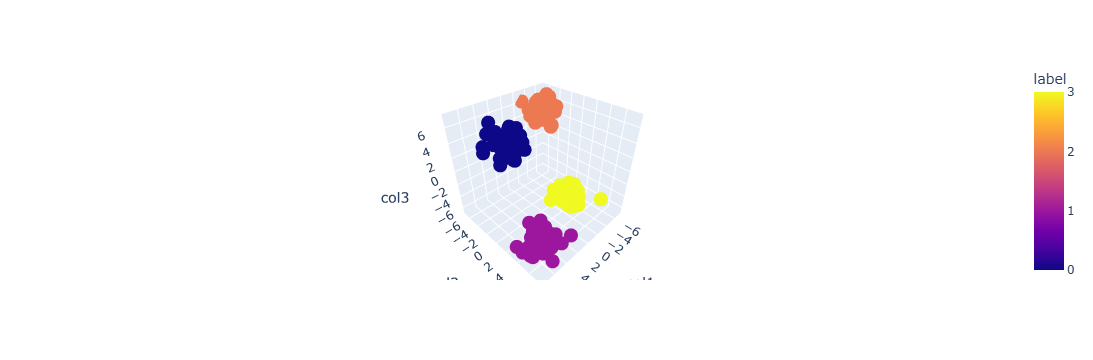

In [34]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()

In [ ]:
K-Means Clustering Kaise Kaam Karta Hai?
K (Number of Clusters) Decide Karo: Sabse pehle, aapko batana padta hai ki aap kitne clusters (groups) chahte hain. Maan lo aapko data ko 3 clusters mein baatna hai (K = 3).

Initial Centroids Set Karo: Algorithm random points choose karti hai har cluster ke center (centroid) ke liye. Yeh centroids randomly select kiye jaate hain.

Har Data Point Ko Cluster Mein Assign Karo: Har data point ko us centroid ke paas assign kiya jaata hai jo uske sabse kareeb hota hai. Yani, har data point ko us cluster mein daala jaata hai jiska center (centroid) sabse nazdeek hota hai.

Centroids Ko Update Karo: Har cluster ke naye center (centroid) ko calculate kiya jaata hai, jo us cluster ke saare points ka average hota hai. Yani, har cluster ka naya centroid uske points ka center ban jaata hai.

Repeat Karo: Phir se data points ko unke closest centroid ke paas assign kiya jaata hai. Fir centroids ko update kiya jaata hai. Yeh process tab tak repeat hota hai jab tak centroids apni jagah par stable na ho jaayein (move hona band kar dein).

Final Clusters: Jab centroids badalna band kar dete hain, tab algorithm ruk jaati hai, aur aapke paas final clusters hote hain. Har cluster ke points apne centroid ke aas-paas grouped hote hain.

Example Se Samajhte Hain: Agar aapke paas students ke marks ka data hai, aur aap unhe 3 groups mein divide karna chahte hain (high, medium, low performers):

Algorithm pehle 3 random centers choose karegi. Fir students ko un centers ke sabse kareeb assign karegi (matlab unka performance kis group se milta hai). Har group ka naya center calculate karegi (average marks), aur students ko phir se closest center ke paas assign karegi. Yeh tab tak chalega jab tak group centers (centroids) stable nahi ho jaate. Kyun Use Karte Hain? Simplify karne ke liye: K-Means complex data ko small groups mein divide karta hai taaki data samajhna aasaan ho. Real-life examples: Customer segmentation (similar customers ko group karna), image compression, recommendation systems, etc. Elbow Method Yeh ek method hai jisse aap decide kar sakte ho ki "K" kitna hona chahiye (optimal number of clusters). WCSS plot kiya jaata hai aur jahan elbow shape banta hai, wahaan K ki value best hoti hai.

In Short: K-Means ek clustering technique hai jo data ko groups mein divide karti hai. Har group ka apna center (centroid) hota hai. Har point us group mein jaata hai jiska center sabse nazdeek hota hai. Algorithm centers ko adjust karti rehti hai jab tak sab stable na ho jaaye.